In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import rosbag
import pandas as pd
from scipy import integrate
from scipy.interpolate import interp1d
from IPython.display import display
from mpldatacursor import datacursor
import time
import math
import cv2
from cv_bridge import CvBridge

In [3]:
#READ BAG

#When recording rosbag follow this sequence:
# 1. rosparam set use_sim_time true
# 3. roslaunch darkentros yolov3.launch
# 4. roslaunch scooter record_data.launch
# 2. rosbag play 2019-02-11-Wentworth-P7.bag /cam_1/color/image_raw:=/cam /cam_2/color/image_raw:=/cam --clock



filename='2019-06-21-MSY-morn-yolo'

bag  = rosbag.Bag('/home/maleen/rosbags/2019-06-20-demo/' + filename + '.bag')

In [4]:
encsize=0
odomsize=0
rtkllasize=0
rtkenusize=0
imusize=0
yolosize=0
lasersize=0
rtabsize=0

encoder_time=np.array([])
encoder_seq=np.array([])
encoder_x=np.array([])
encoder_y=np.array([])

odom_time=np.array([])
odom_seq=np.array([])
odom_x=np.array([])
odom_y=np.array([])
odom_theta=np.array([])

odom_vx=np.array([])
odom_vy=np.array([])
odom_vtheta=np.array([])

rtklla_time=np.array([])
rtklla_seq=np.array([])
rtklla_lat=np.array([])
rtklla_long=np.array([])
rtklla_alti=np.array([])

rtkenu_time=np.array([])
rtkenu_seq=np.array([])
rtkenu_x=np.array([])
rtkenu_y=np.array([])
rtkenu_z=np.array([])

imu_time=np.array([])
imu_seq=np.array([])
imu_angvZ=np.array([])
imu_angvX=np.array([])
imu_angvY=np.array([])

yolo_time=np.array([])
yolo_seq=np.array([])
image_time=np.array([])
image_seq=np.array([])
image_frame=np.array([])
bounding_box=[]
detectimg_time=np.array([])
detectimg=np.array([])
foundobj=np.array([])
foundobj_time=np.array([])

laser_time=np.array([])
laser_seq=np.array([])
laser_range=np.array([])

rtab_time=np.array([])
rtab_seq=np.array([])
rtab_x=np.array([])
rtab_y=np.array([])
rtab_theta=np.array([])

rtab_orientx=np.array([])
rtab_orienty=np.array([])
rtab_orientz=np.array([])
rtab_orientw=np.array([])
            
encoder_data=np.array([])

topiclist=['/encoder_ticks','/odom','/piksi/navsatfix_best_fix','/casimu/imureal', '/piksi/enu_pose_best_fix','/darknet_ros/bounding_boxes','/darknet_ros/detection_image', '/darknet_ros/found_object','/scan','/rtabmap/localization_pose']



for topic, msg, t in bag.read_messages(topics=topiclist): #
    
        if topic=='/encoder_ticks':
            
            encoder_time=np.append(encoder_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            encoder_seq=np.append(encoder_seq,msg.header.seq)
            encoder_x=np.append(encoder_x,-msg.ticks.x)
            encoder_y=np.append(encoder_y,-msg.ticks.y)
            encsize=encsize+1            
            
        elif topic=='/odom':
        
            odom_time=np.append(odom_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            odom_seq=np.append(odom_seq,msg.header.seq)
            
            odom_x=np.append(odom_x, msg.pose.pose.position.x)
            odom_y=np.append(odom_y, msg.pose.pose.position.y)
            odom_theta=np.append(odom_theta, msg.pose.pose.orientation.z)
            
            
            odom_vx=np.append(odom_vx, msg.twist.twist.linear.x)
            odom_vy=np.append(odom_vy, msg.twist.twist.linear.y)
            odom_vtheta=np.append(odom_vtheta, msg.twist.twist.angular.z)
            
            #encoder_data=np.append(encoder_data,[odom_time,odom_vx,odom_vy])
            
            #print msg
            
        elif topic=='/piksi/navsatfix_best_fix':
        
            rtklla_time=np.append(rtklla_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtklla_seq=np.append(rtklla_seq,msg.header.seq)
            #print msg
            rtklla_lat=np.append(rtklla_lat,(msg.latitude))
            rtklla_long=np.append(rtklla_long,(msg.longitude))
            rtklla_alti=np.append(rtklla_alti,(msg.altitude))
            rtkllasize=rtkllasize+1
            
            
        elif topic=='/piksi/enu_pose_best_fix':
        
            rtkenu_time=np.append(rtkenu_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtkenu_seq=np.append(rtkenu_seq,msg.header.seq)
            rtkenu_x=np.append(rtkenu_x,(msg.pose.pose.position.x))
            rtkenu_y=np.append(rtkenu_y,(msg.pose.pose.position.y))
            rtkenu_z=np.append(rtkenu_z,(msg.pose.pose.position.z))
            rtkenusize=rtkenusize+1
            #print msg
        
        
        elif topic=='/casimu/imureal':
        
            imu_time=np.append(imu_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            imu_seq=np.append(imu_seq,msg.header.seq)
            #print msg
            imu_angvZ=np.append(imu_angvZ,(msg.angular_velocity.z))
            imu_angvX=np.append(imu_angvX,(msg.angular_velocity.x))
            imu_angvY=np.append(imu_angvY,(msg.angular_velocity.y))
            imusize=imusize+1
            
        elif topic=='/darknet_ros/bounding_boxes':
            
            yolo_time=np.append(yolo_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            yolo_seq=np.append(yolo_seq,msg.header.seq)

            
            image_time=np.append(image_time,(msg.image_header.stamp.secs)+(Decimal(msg.image_header.stamp.nsecs)/1000000000))
            image_seq=np.append(image_seq,msg.image_header.seq)
            frame=msg.image_header.frame_id
            
                        
            bounding_box.append(msg.bounding_boxes)
            
            ##print msg.bounding_boxes
            
            #overall_time=np.append(overall_time,(msg.image_header.stamp.secs)+(Decimal(msg.image_header.stamp.nsecs)/1000000000))
            
            if frame=='cam_1_color_optical_frame':
            
                #labels=np.append(labels,'C1')
                image_frame=np.append(image_frame,'C1')
                
            elif frame=='cam_2_color_optical_frame':
            
                #labels=np.append(labels,'C2')
                image_frame=np.append(image_frame,'C2')
            
        elif topic=='/darknet_ros/detection_image':
            
            #cv_image = bridge.imgmsg_to_cv2(msg.data, desired_encoding="passthrough")
        
            detectimg_time=np.append(detectimg_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            detectimg=np.append(detectimg,msg)
            yolosize=yolosize+1
            
        elif topic=='/darknet_ros/found_object':
           
            foundobj=np.append(foundobj,msg.data)
            
        elif topic=='/scan':
            laser_time=np.append(laser_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            laser_seq=np.append(laser_seq,msg.header.seq)
            laser_range=np.append(laser_range,msg.ranges)
            
        elif topic=='/rtabmap/localization_pose':
            rtab_time=np.append(rtab_time,(msg.header.stamp.secs)+(Decimal(msg.header.stamp.nsecs)/1000000000))
            rtab_seq=np.append(rtab_seq,msg.header.seq)
            rtab_x=np.append(rtab_x, msg.pose.pose.position.x)
            rtab_y=np.append(rtab_y, msg.pose.pose.position.y)
            
            rtab_orientx=np.append(rtab_orientx, msg.pose.pose.orientation.x)
            rtab_orienty=np.append(rtab_orienty, msg.pose.pose.orientation.y)
            rtab_orientz=np.append(rtab_orientz, msg.pose.pose.orientation.z)
            rtab_orientw=np.append(rtab_orientw, msg.pose.pose.orientation.w)
            
          

      

3894

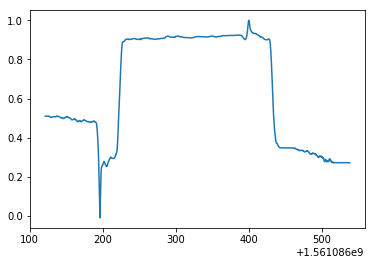

In [5]:
plt.plot(odom_time,odom_theta)
odom_theta.size

In [6]:
for m in bounding_box[4]:
    print m.xmin

46


In [7]:
#bounding_box[4]
encoder_data.shape

(0,)

In [8]:
laser_range=np.reshape(laser_range, (laser_time.size,laser_range.size/laser_time.size))  
laser_range.shape
rtab_time

array([Decimal('1561086124.551411001'), Decimal('1561086125.673165581'),
       Decimal('1561086127.047695678'), Decimal('1561086128.121855265'),
       Decimal('1561086129.196216433'), Decimal('1561086130.295706831'),
       Decimal('1561086131.345149408'), Decimal('1561086132.569540378'),
       Decimal('1561086133.644019238'), Decimal('1561086134.718529198'),
       Decimal('1561086135.742973031'), Decimal('1561086136.842395879'),
       Decimal('1561086137.891903956'), Decimal('1561086138.966356121'),
       Decimal('1561086140.040850616'), Decimal('1561086141.115327526'),
       Decimal('1561086142.164803487'), Decimal('1561086143.239316354'),
       Decimal('1561086144.31369733'), Decimal('1561086145.388218112'),
       Decimal('1561086146.737551132'), Decimal('1561086147.73912254'),
       Decimal('1561086148.811496581'), Decimal('1561086149.861479731'),
       Decimal('1561086150.935411209'), Decimal('1561086152.009965238'),
       Decimal('1561086153.059502448'), Decimal('1561

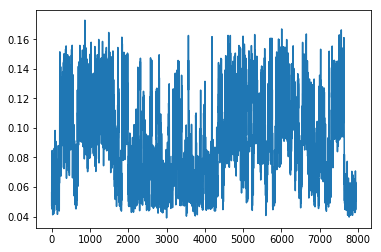

In [9]:
latency=yolo_time-image_time
plt.plot(latency)

In [10]:
#BRING DATA TO ENCODER TIME

imu_time=imu_time-encoder_time[0]
rtklla_time=rtklla_time-encoder_time[0]
rtkenu_time=rtkenu_time-encoder_time[0]
odom_time=odom_time-encoder_time[0]

yolo_time=yolo_time-encoder_time[0]
image_time=image_time-encoder_time[0]
laser_time=laser_time-encoder_time[0]
rtab_time=rtab_time-encoder_time[0]

encoder_time=encoder_time-encoder_time[0]

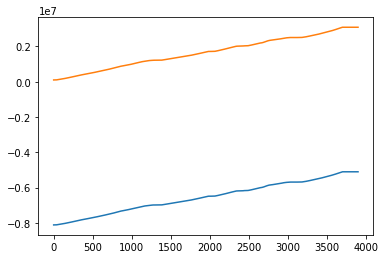

In [11]:
x=0
y=0
sign_x=0
sign_y=0

diffarray=np.array([])

for x in range(1,encoder_x.size-1):
    
    diff=encoder_x[x]-encoder_x[x-1]

    if abs(diff) > 16770000:
              
        sign_x=1
        changevalx=encoder_x[x-1]
        encoder_x[x]=encoder_x[x]+changevalx
           
        
    if sign_x==1:
    
        encoder_x[x+1]=encoder_x[x+1]+changevalx

        
for y in range(1,encoder_y.size-1):
    
    
    diff=encoder_y[y]-encoder_y[y-1]
    diffarray=np.append(diffarray,diff)

    if abs(diff) > 16770000:
              
        sign_y=1
        changevaly=diff
        encoder_y[y]=encoder_y[y]-changevaly   
        
        
    if sign_y==1:
    
        encoder_y[y+1]=encoder_y[y+1]-changevaly

encoder_mean=(encoder_x-encoder_y)/2
encoder_y=-encoder_y

encoderdata={'encoder_seq':encoder_seq, 'encoder_time':encoder_time, 'encoder_x':encoder_x, 'encoder_y':encoder_y, 'encoder_mean':encoder_mean}
encoder_df = pd.DataFrame(encoderdata, columns=['encoder_seq','encoder_time','encoder_x','encoder_y','encoder_mean'])
#print encoder_df

plt.plot(encoder_x)
#plt.plot(encoder_y)
plt.plot(encoder_mean)


In [12]:
odomdata={'odom_seq':odom_seq, 'odom_time':odom_time, 'odom_x':odom_x, 'odom_y':odom_y, 'odom_theta':odom_theta, 'odom_vx':odom_vx,'odom_vy':odom_vy,'odom_vtheta':odom_vtheta}
odom_df = pd.DataFrame(odomdata, columns=['odom_seq','odom_time','odom_x','odom_y','odom_theta','odom_vx','odom_vy','odom_vtheta'])

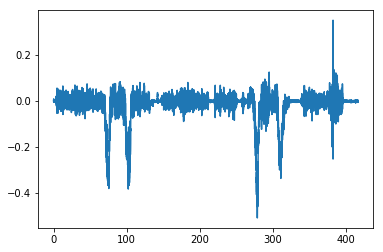

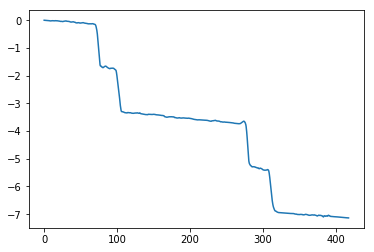

In [13]:
imu_angvZ=imu_angvZ-imu_angvZ[0]
imu_angvX=imu_angvX-imu_angvX[0]
imu_angvY=imu_angvY-imu_angvY[0]

plt.figure(1)
plt.plot(imu_time,-imu_angvZ)
thetaZ=integrate.cumtrapz(-imu_angvZ,np.float64(imu_time),initial=0)
thetaX=integrate.cumtrapz(imu_angvX,np.float64(imu_time),initial=0)
thetaY=integrate.cumtrapz(imu_angvY,np.float64(imu_time),initial=0)

plt.figure(2)
plt.plot(imu_time,thetaZ)
#plt.plot(imureal_time,thetaX)
#plt.plot(imureal_time,thetaY)

imudata={'imu_time':imu_time, 'imu_angvZ':-imu_angvZ, 'thetaZ':thetaZ}
imu_df = pd.DataFrame(imudata,columns=['imu_time','im_angvZ','thetaZ'])

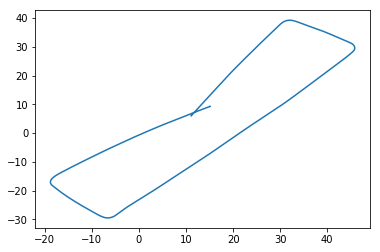

In [14]:
plt.plot(odom_x,odom_y)

In [15]:
#OBTAIN ENCODER DISTANCES

dist=0

encXcalib=6.608284615932709e-05;
encYcalib=6.603486193757895e-05;
mean_calib=np.mean([encXcalib,encYcalib])

enc_dist=np.array([])
enc_times=np.array([])

mean_enctime=np.array([])


for enciter in range(1,encoder_mean.size):

    
    dist=(encoder_mean[enciter]-encoder_mean[enciter-1])*mean_calib
    
    enc_dist=np.append(enc_dist,dist)
    
    enc_times=np.append(enc_times, encoder_time[enciter])
    
    mean_enctime=np.append(mean_enctime,(encoder_time[enciter]+encoder_time[enciter-1])/2)
    

In [16]:
#INTERPOLATE THETA Z

thetaZ_interp=interp1d(np.float64(imu_time), thetaZ, kind='linear')

#print thetaZ_interp(np.float64(mean_enctime))

#print enc_dist

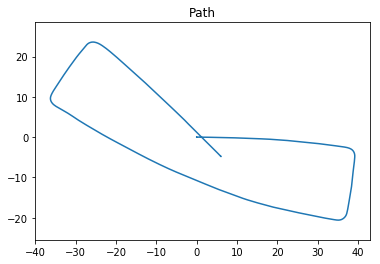

In [17]:
#mean_theta=mean_theta-mean_theta[0]
#plt.rcParams['figure.figsize'] = [50,50]

#thetaZ_samp=thetaZ_interp(np.float64(mean_enctime))
THETA_pos=thetaZ_interp(np.float64(enc_times))

dx=np.multiply(enc_dist,np.cos(THETA_pos))
dy=np.multiply(enc_dist,np.sin(THETA_pos))
Xd=0
Yd=0

X_pos=np.array([])
Y_pos=np.array([])


for num in range(0,encoder_mean.size-1):
    
    Xd=Xd+dx[num]
    Yd=Yd+dy[num]
    
    X_pos=np.append(X_pos,Xd)
    Y_pos=np.append(Y_pos,Yd)

    
plt.plot(X_pos,Y_pos)
plt.axis('equal')
plt.title('Path')
datacursor()
plt.show()




In [ ]:
#PROCESS YOLO DATA

#FILTER OUT DETECTED IMAGES

bridge = CvBridge()
detected_images=[]
#detected_images2=[]

x1=0


for num in foundobj:
    
    if num>0:
        
        cv_image = bridge.imgmsg_to_cv2(detectimg[x1], desired_encoding="passthrough")
        detected_images.append(cv_image)
    
    x1=x1+1
    
#for num in foundobj2:
    
#    if num>0:

#        cv_image = bridge.imgmsg_to_cv2(detectimg2[x2], desired_encoding="passthrough")
#        detected_images2.append(cv_image)
    
#    x2=x2+1
    




#yolodata2={'yolo_seq2':yolo_seq2, 'yolo_time2':yolo_time2,'image_seq2':image_seq2, 'image_time2':image_time2,'bounding_box2':bounding_box2}
#yolo_df2 = pd.DataFrame(yolodata2, columns=['yolo_seq2','yolo_time2','image_seq2','image_time2','bounding_box2'])

plt.imshow(cv2.cvtColor(detected_images[20], cv2.COLOR_BGR2RGB))
#plt.imshow(detected_images[25])
plt.show()

i=1
for img in detected_images:

    cv2.imwrite('/home/maleen/rosbags/img_data/'+ filename + "-"+ str(i) + ".jpg",img) #[int(cv2.IMWRITE_JPEG_QUALITY), 100]) 
    
    i=i+1

#print yolo_df

In [18]:
yolodata={'yolo_seq':yolo_seq, 'yolo_time':yolo_time,'image_seq':image_seq, 'image_time':image_time,'image_frame':image_frame,'bounding_box':bounding_box}
yolo_df = pd.DataFrame(yolodata, columns=['yolo_seq','yolo_time','image_seq','image_time','image_frame','bounding_box'])

In [19]:
#EXTRACT YOLO DATA

lamp_dimensions=np.array([])
lamp_times=np.array([])
yolo_index=np.array([])
camera=np.array([])
semantic_label=np.array([])

#lamp_dimensions2=np.array([])
#lamp_times2=np.array([])
#yolo_index2=np.array([])


for row_index,row in yolo_df.iterrows():
    
        for obj in row[5]:
             if obj.Class=='post'  or  obj.Class=='parking meter' or  obj.Class=='street sign' or obj.Class=='tree':
               #or  obj.Class=='tree'
                print obj.Class
                if row[3]>mean_enctime[0] and row[3]<mean_enctime[-1]:
                    lamp_dimensions=np.append(lamp_dimensions,[obj.xmin,obj.ymin,obj.xmax,obj.ymax])
                    lamp_times=np.append(lamp_times,row[3])
                    yolo_index=np.append(yolo_index, row[0]) 
                    camera=np.append(camera,row[4])
                    semantic_label=np.append(semantic_label,obj.Class)
                    
lamp_dimensions=np.reshape(lamp_dimensions, (lamp_dimensions.size/4, 4))  
                    
#for row_index,row in yolo_df2.iterrows():
    
#        for obj in row[4]:
#             if obj.Class=='streetlamp':
#                if row[3]>mean_enctime[0] and row[3]<mean_enctime[-1]:
#                    lamp_dimensions2=np.append(lamp_dimensions2,[obj.xmin,obj.ymin,obj.xmax,obj.ymax])
#                    lamp_times2=np.append(lamp_times2,row[3])
#                    yolo_index2=np.append(yolo_index2, row[0]) 
                    
#lamp_dimensions2=np.reshape(lamp_dimensions2, (lamp_dimensions2.size/4, 4))  

post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post


post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post


post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post
post


parking meter
parking meter
post
parking meter
post
post
post
parking meter
parking meter
parking meter
parking meter
post
parking meter
post
parking meter
post
post
parking meter
post
parking meter
post
parking meter
post
parking meter
post
post
parking meter
parking meter
parking meter
post
post
parking meter
parking meter
parking meter
parking meter
parking meter
post
post
post
post
parking meter
post
parking meter
post
post
parking meter
parking meter
post
parking meter
parking meter
parking meter
parking meter
post
post
parking meter
post
parking meter
post
post
parking meter
post
post
parking meter
post
parking meter
parking meter
parking meter
parking meter
post
post
post
post
post
parking meter
post
post
parking meter
post
post
post
post
parking meter
post
post
parking meter
post
post
parking meter
parking meter
parking meter
parking meter
post
post
parking meter
parking meter
parking meter
parking meter
parking meter
parking meter
parking meter
parking meter
post
parking meter

In [20]:
def getyolobearing(dimensions):
    
    h_fov=np.deg2rad(69.4)
    h_width=640
    centerX=h_width/2
    
    rad_per_pix=h_fov/h_width

    centroids=np.zeros((dimensions.shape[0],2))
    bearings=np.zeros(dimensions.shape[0])
    gradients=np.zeros(dimensions.shape[0])
    intercepts=np.zeros(dimensions.shape[0])
    
  
    centroids[:,0]=(dimensions[:,0]+dimensions[:,2])/2
    centroids[:,1]=(dimensions[:,1]+dimensions[:,3])/2
    
    bearings=(centroids[:,0]-centerX)*rad_per_pix
    gradients=np.tan(bearings)
    
    bx1=(dimensions[:,0]-centerX)*rad_per_pix
    bx2=(dimensions[:,2]-centerX)*rad_per_pix
    
    return bearings,centroids,bx1,bx2

In [21]:
bearings,centroids,bx1,bx2=getyolobearing(lamp_dimensions) 
#bearings2,centroids2=getyolobearing(lamp_dimensions2)


lampdata={'yolo_index':yolo_index,'lamp_times':lamp_times,'camera':camera,'bearings':bearings,'centroid_x':centroids[:,0],'centroid_y':centroids[:,1],'boundingx1':lamp_dimensions[:,0],'boundingx2':lamp_dimensions[:,2],'bx1':bx1,'bx2':bx2, 'semantic_label':semantic_label}
lampdata_df= pd.DataFrame(lampdata,columns=['yolo_index','lamp_times','camera','bearings','centroid_x','centroid_y','boundingx1','boundingx2','bx1','bx2','semantic_label'])

#lampdata2={'yolo_index2':yolo_index2,'lamp_times2':lamp_times2,'bearings2':bearings2,'centroid_x2':centroids2[:,0],'centroid_y2':centroids2[:,1]}
#lampdata_df2 = pd.DataFrame(lampdata2,columns=['yolo_index2','lamp_times2','bearings2','centroid_x2','centroid_y2'])

In [22]:
rtabdata={'rtab_seq':rtab_seq, 'rtab_time':rtab_time, 'rtab_x':rtab_x, 'rtab_y':rtab_y, 'rtab_orientx':rtab_orientx, 'rtab_orienty':rtab_orienty, 'rtab_orientz':rtab_orientz, 'rtab_orientw':rtab_orientw}
rtab_df = pd.DataFrame(rtabdata, columns=['rtab_seq','rtab_time','rtab_x','rtab_y','rtab_orientx','rtab_orienty','rtab_orientz','rtab_orientw'])

In [23]:
RTKdata={'rtk_time':rtklla_time,'rtklla_lat':rtklla_lat,'rtklla_long':rtklla_long,'rtklla_alti':rtklla_alti}
RTK_df = pd.DataFrame(RTKdata,columns=['rtk_time','rtklla_lat','rtklla_long','rtklla_alti'])

In [24]:
laserdata={'laser_seq':laser_seq,'laser_time':laser_time}
laser_df = pd.DataFrame(laserdata,columns=['laser_seq','laser_time'])

In [25]:
RTK_df.to_csv('/home/maleen/git/ams_primary/data_process/csv_data/map_data/'+filename + '-RTK.csv')
lampdata_df.to_csv('/home/maleen/git/ams_primary/data_process/csv_data/map_data/'+filename + '-lampdata.csv')
rtab_df.to_csv('/home/maleen/git/ams_primary/data_process/csv_data/map_data/'+filename + '-rtabdata.csv')
odom_df.to_csv('/home/maleen/git/ams_primary/data_process/csv_data/map_data/'+filename + '-odomdata.csv')
laser_df.to_csv('/home/maleen/git/ams_primary/data_process/csv_data/map_data/'+filename + '-laser_timedata.csv')


In [26]:
np.savetxt('/home/maleen/git/ams_primary/data_process/csv_data/map_data/'+filename + '-laser_rangedata.csv', laser_range, delimiter=",")

In [ ]:
rtab_y.size
